# <font color='red'>Desafio – Analytics Engineer - SmarttBot</font>

In [1]:
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
con=sqlalchemy.create_engine('mysql+pymysql://root:@localhost:3306/dataengineer')

<font color='red'>1) Escreva uma query que retorna a quantidade de linhas na tabela Sales.SalesOrderDetail
pelo campo SalesOrderID, desde que tenham pelo menos três linhas de detalhes.</font>

In [3]:
query1 = '''
SELECT SalesOrderID as id, 
COUNT(*) AS qtd 
FROM sales_salesorderdetail as sod
GROUP BY SalesOrderID
HAVING qtd >= 3;
'''

In [4]:
qtd = pd.read_sql_query(query1,con)
qtd

,id,qtd
0,43659,12
1,43661,15
2,43662,22
3,43664,8
4,43665,10
...,...,...
10673,70482,3
10674,70483,3
10675,70484,3
10676,70489,5


<font color='red'> 2) Escreva uma query que ligue as tabelas Sales.SalesOrderDetail, Sales.SpecialOfferProduct
e Production.Product e retorne os 3 produtos (Name) mais vendidos (pela soma de
OrderQty), agrupados pelo número de dias para manufatura (DaysToManufacture).</font>

In [5]:
query2 = '''
    SELECT * FROM sales_salesorderdetail
        INNER JOIN production_product ON production_product.ProductID = sales_salesorderdetail.ProductID
        INNER JOIN sales_specialofferproduct ON sales_salesorderdetail.ProductID = sales_specialofferproduct.ProductID;
'''

In [6]:
#essa tabela foi inserida no banco de dados
inter1 = pd.read_sql_query(query2,con)
inter1 

,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,...,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate,SpecialOfferID,ProductID,rowguid,ModifiedDate
0,43659,1,4911-403C-98,1,776,1,"2024,994","0,00",2024.994,B207C96D-D9E6-402B-8470-2CC176C42283,...,19,2011-05-31 00:00:00.000,2012-05-29 00:00:00.000,None,02935111-A546-4C6D-941F-BE12D42C158E,2014-02-08 10:01:36.827,1,776,D70CF5A5-07F0-4D60-B292-5E07F5EC614D,2011-04-01 00:00:00.000
1,43659,1,4911-403C-98,1,776,1,"2024,994","0,00",2024.994,B207C96D-D9E6-402B-8470-2CC176C42283,...,19,2011-05-31 00:00:00.000,2012-05-29 00:00:00.000,None,02935111-A546-4C6D-941F-BE12D42C158E,2014-02-08 10:01:36.827,2,776,2BE15DD8-B110-418A-B0EE-AC5F1A35B10B,2011-05-01 00:00:00.000
2,43659,1,4911-403C-98,1,776,1,"2024,994","0,00",2024.994,B207C96D-D9E6-402B-8470-2CC176C42283,...,19,2011-05-31 00:00:00.000,2012-05-29 00:00:00.000,None,02935111-A546-4C6D-941F-BE12D42C158E,2014-02-08 10:01:36.827,7,776,8A0B46A3-7336-4F9A-AA82-A90380E33572,2012-03-14 00:00:00.000
3,43659,2,4911-403C-98,3,777,1,"2024,994","0,00",6074.982,7ABB600D-1E77-41BE-9FE5-B9142CFC08FA,...,19,2011-05-31 00:00:00.000,2012-05-29 00:00:00.000,None,7920BC3B-8FD4-4610-93D2-E693A66B6474,2014-02-08 10:01:36.827,1,777,97A7183A-A0BE-42FD-BE18-209881576558,2011-04-01 00:00:00.000
4,43659,2,4911-403C-98,3,777,1,"2024,994","0,00",6074.982,7ABB600D-1E77-41BE-9FE5-B9142CFC08FA,...,19,2011-05-31 00:00:00.000,2012-05-29 00:00:00.000,None,7920BC3B-8FD4-4610-93D2-E693A66B6474,2014-02-08 10:01:36.827,2,777,3D539D6C-DFBE-4839-ADCB-09B1D4D9235A,2011-05-01 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262325,70490,107371,None,1,711,1,"34,99","0,00",34.990,E3242759-8942-49F9-ACC5-6B6DDEEA81D3,...,33,2011-05-31 00:00:00.000,None,None,FD7C0858-4179-48C2-865B-ABD5DFC7BC1D,2014-02-08 10:01:36.827,2,711,11166A91-5087-4C1E-B32A-D6FE4EAD9144,2011-05-01 00:00:00.000
262326,70490,107371,None,1,711,1,"34,99","0,00",34.990,E3242759-8942-49F9-ACC5-6B6DDEEA81D3,...,33,2011-05-31 00:00:00.000,None,None,FD7C0858-4179-48C2-865B-ABD5DFC7BC1D,2014-02-08 10:01:36.827,3,711,DD280317-257F-47C8-BE06-29DF75B505CC,2011-05-01 00:00:00.000
262327,70490,107371,None,1,711,1,"34,99","0,00",34.990,E3242759-8942-49F9-ACC5-6B6DDEEA81D3,...,33,2011-05-31 00:00:00.000,None,None,FD7C0858-4179-48C2-865B-ABD5DFC7BC1D,2014-02-08 10:01:36.827,8,711,F7676DEC-B06B-48AF-917E-7C39341E7F74,2012-04-30 00:00:00.000
262328,70490,107371,None,1,711,1,"34,99","0,00",34.990,E3242759-8942-49F9-ACC5-6B6DDEEA81D3,...,33,2011-05-31 00:00:00.000,None,None,FD7C0858-4179-48C2-865B-ABD5DFC7BC1D,2014-02-08 10:01:36.827,11,711,9BF2C427-FF7E-4765-8BCB-7592F243F6E8,2013-04-30 00:00:00.000


In [7]:
query22 = '''SELECT Name, SUM(OrderQty) AS 'SUM(OrderQty)'
FROM inter1
GROUP BY DaysToManufacture
ORDER BY SUM(OrderQty) DESC
limit 3;
'''

In [8]:
tab = pd.read_sql_query(query22,con)
tab

,Name,SUM(OrderQty)
0,"Mountain-100 Black, 42",1148.0
1,AWC Logo Cap,580.0
2,"HL Mountain Frame - Black, 48",237.0


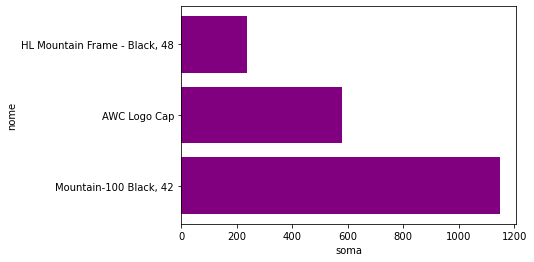

In [9]:
#Gráfico da tabela anterior
nome = ['Mountain-100 Black, 42','AWC Logo Cap','HL Mountain Frame - Black, 48']
soma = [1148,580,237]
plt.barh(nome,soma, color='purple')
plt.ylabel('nome', color='black')
plt.xlabel('soma',color='black')
plt.show()

<font color='red'> 3) Escreva uma query ligando as tabelas Person.Person, Sales.Customer e
Sales.SalesOrderHeader de forma a obter uma lista de nomes de clientes e uma contagem
de pedidos efetuados.</font>

In [10]:
query3='''
SELECT c.CustomerID as id,
       CONCAT(p.FirstName, ' ', p.LastName) as name, 
       COUNT(*) AS qtd 
FROM sales_salesorderheader as soh
INNER JOIN sales_customer as c ON soh.CustomerID = c.CustomerID
INNER JOIN person_person as p ON c.PersonID = p.BusinessEntityID 
GROUP BY c.PersonID
ORDER BY qtd DESC
'''

In [11]:
inter2 = pd.read_sql_query(query3,con)
inter2

,id,name,qtd
0,11223,Hailey Patterson,26
1,11331,Samantha Jenkins,26
2,11330,Ryan Thompson,26
3,11300,Fernando Barnes,25
4,11185,Ashley Henderson,25
...,...,...,...
18112,27888,Tina Rodriguez,1
18113,16435,Steven Cooper,1
18114,11418,Rafael Hu,1
18115,12527,JosÃ© Rodriguez,1


<font color='red'> 4) Escreva uma query usando as tabelas Sales.SalesOrderHeader, Sales.SalesOrderDetail e
Production.Product, de forma a obter a soma total de produtos (OrderQty) por ProductID e
OrderDate.</font>

In [12]:
query4 = '''
SELECT * FROM sales_salesorderdetail
        INNER JOIN sales_salesorderheader ON sales_salesorderheader.SalesOrderID  = sales_salesorderdetail.SalesOrderID 
        INNER JOIN production_product ON sales_salesorderdetail.ProductID = production_product.ProductID;
'''

In [13]:
#essa tabela foi inserida no banco de dados
inter2 = pd.read_sql_query(query4,con)
inter2

,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,43659,1,4911-403C-98,1,776,1,"2024,994","0,00",2024.994,B207C96D-D9E6-402B-8470-2CC176C42283,...,M,H,U,1,19,2011-05-31 00:00:00.000,2012-05-29 00:00:00.000,None,02935111-A546-4C6D-941F-BE12D42C158E,2014-02-08 10:01:36.827
1,43659,2,4911-403C-98,3,777,1,"2024,994","0,00",6074.982,7ABB600D-1E77-41BE-9FE5-B9142CFC08FA,...,M,H,U,1,19,2011-05-31 00:00:00.000,2012-05-29 00:00:00.000,None,7920BC3B-8FD4-4610-93D2-E693A66B6474,2014-02-08 10:01:36.827
2,43659,3,4911-403C-98,1,778,1,"2024,994","0,00",2024.994,475CF8C6-49F6-486E-B0AD-AFC6A50CDD2F,...,M,H,U,1,19,2011-05-31 00:00:00.000,2012-05-29 00:00:00.000,None,1B486300-7E64-4C5D-A9BA-A8368E20C5A0,2014-02-08 10:01:36.827
3,43659,4,4911-403C-98,1,771,1,"2039,994","0,00",2039.994,04C4DE91-5815-45D6-8670-F462719FBCE3,...,M,H,U,1,19,2011-05-31 00:00:00.000,2012-05-29 00:00:00.000,None,CA74B54E-FC30-4464-8B83-019BFD1B2DBB,2014-02-08 10:01:36.827
4,43659,5,4911-403C-98,1,772,1,"2039,994","0,00",2039.994,5A74C7D2-E641-438E-A7AC-37BF23280301,...,M,H,U,1,19,2011-05-31 00:00:00.000,2012-05-29 00:00:00.000,None,BBFFF5A5-4BDC-49A9-A5AD-7584ADFFE808,2014-02-08 10:01:36.827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107367,70489,107368,None,1,707,1,"34,99","0,00",34.990,3EC8A003-541C-4286-B07A-0CDE6AC1D2D0,...,S,None,None,31,33,2011-05-31 00:00:00.000,None,None,2E1EF41A-C08A-4FF6-8ADA-BDE58B64A712,2014-02-08 10:01:36.827
107368,70490,107369,None,1,922,1,"3,99","0,00",3.990,5A321283-6A15-4A91-87D7-C3C018FB5EDD,...,R,None,None,37,93,2013-05-30 00:00:00.000,None,None,EA442BD7-F69B-42D9-AA71-95E10B648F52,2014-02-08 10:01:36.827
107369,70490,107370,None,1,931,1,"21,49","0,00",21.490,B0EE7396-6306-4826-ABC2-DBF35AEFDDDC,...,R,L,None,37,88,2013-05-30 00:00:00.000,None,None,15B569A6-D172-42C2-A420-62AB5946CC80,2014-02-08 10:01:36.827
107370,70490,107371,None,1,711,1,"34,99","0,00",34.990,E3242759-8942-49F9-ACC5-6B6DDEEA81D3,...,S,None,None,31,33,2011-05-31 00:00:00.000,None,None,FD7C0858-4179-48C2-865B-ABD5DFC7BC1D,2014-02-08 10:01:36.827


In [14]:
query44 = '''SELECT ProductID, OrderDate, SUM(OrderQty) AS 'SUM(OrderQty)'
FROM inter2
ORDER BY OrderDate;
'''

In [15]:
tab2 = pd.read_sql_query(query44,con)
tab2

,ProductID,OrderDate,SUM(OrderQty)
0,776,2011-05-31 00:00:00.000,1917.0


<font color='red'> 5) Escreva uma query mostrando os campos SalesOrderID, OrderDate e TotalDue da tabela
Sales.SalesOrderHeader. Obtenha apenas as linhas onde a ordem tenha sido feita durante
o mês de setembro/2011 e o total devido esteja acima de 1.000. Ordene pelo total devido
decrescente.</font>

In [16]:
query5 = '''
SELECT SalesOrderID, OrderDate, TotalDue 
FROM sales_salesorderheader  
WHERE OrderDate BETWEEN DATE('2011-09-01') AND DATE('2011-09-30') AND TotalDue > 1.000
ORDER BY TotalDue DESC;
'''

In [17]:
inter3 = pd.read_sql_query(query5,con)
inter3

,SalesOrderID,OrderDate,TotalDue
0,44335,2011-09-04 00:00:00.000,"772,5036"
1,44342,2011-09-05 00:00:00.000,"772,5036"
2,44346,2011-09-06 00:00:00.000,"772,5036"
3,44353,2011-09-07 00:00:00.000,"772,5036"
4,44354,2011-09-07 00:00:00.000,"772,5036"
...,...,...,...
152,44408,2011-09-15 00:00:00.000,"3729,364"
153,44412,2011-09-16 00:00:00.000,"3729,364"
154,44468,2011-09-28 00:00:00.000,"3729,364"
155,44479,2011-09-30 00:00:00.000,"3729,364"
